In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

from  tensorflow import keras 
sys.path.append("..") # Adds higher directory to python modules path.
import brevis
from brevis import branches
from brevis import evaluate

In [2]:
# train_ds, test_ds, validation_ds = brevis.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(227,227),include_targets=False,num_outputs = 10)
 # the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# train_ds, test_ds= tf.keras.datasets.cifar10.load_data()
train_ds, test_ds, validation_ds = brevis.dataset.prepare.dataset(tf.keras.datasets.mnist.load_data(),32,5000,22500,categorical=True,include_targets=False,num_outputs = 10)

KeyboardInterrupt: 

In [13]:
num_classes = 10
input_shape = (28, 28, 1)
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(516, activation="relu"),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(516, activation="relu"),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(516, activation="relu"),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(516, activation="relu"),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(516, activation="relu"),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(num_classes, activation="softmax"),
#         # # tf.keras.layers.Reshape(input_shape),
#         # tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         # tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         # tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         # tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         # tf.keras.layers.Flatten(),
#         # tf.keras.layers.Dropout(0.5),
#         # tf.keras.layers.Dense(num_classes, activation="softmax"),
#     ]
# )

outputs =[]
inputs = keras.Input(shape=(28,28))
x = keras.layers.Flatten(input_shape=(28,28))(inputs)
x = keras.layers.Dense(512, activation="relu")(x)
x= keras.layers.Dropout(0.2)(x)
#exit 2
x = keras.layers.Dense(512, activation="relu")(x)
# x= keras.layers.Dropout(0.2)(x)
#exit 3
x = keras.layers.Dense(512, activation="relu")(x)
# x= keras.layers.Dropout(0.2)(x)
#exit 4
x = keras.layers.Dense(512, activation="relu")(x)
# x= keras.layers.Dropout(0.2)(x)
#exit 5
x = keras.layers.Dense(512, activation="relu")(x)
# x= keras.layers.Dropout(0.2)(x)
#exit 1 The main branch exit is refered to as "exit 1" or "main exit" to avoid confusion when adding addtional exits
output1 = keras.layers.Dense(10, name="output1")(x)
# softmax = keras.layers.Softmax()(output1)

model = keras.Model(inputs=inputs, outputs=output1, name="mnist_model_normal")
model.summary()

# model.compile(loss='mean_squared_error', optimizer="adam", metrics=['accuracy'])
# print(train_ds)
# model.fit(train_ds, epochs=9)

Model: "mnist_model_normal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 512)        

In [21]:

def loss_function():
    def mse_loss(p, alpha): 
        alpha = alpha + 1
        S = tf.reduce_sum(alpha,axis=1,keepdims=True) 
        tf.print("S",S)
        E = alpha - 1

        m = alpha / S
        tf.print("m", m)
        A = tf.reduce_sum((p-m)**2, axis=1, keepdims=True) 
        print("A",A)
        B = tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True) 
        print("B",B)
        annealing_coef = tf.minimum(1.0,tf.cast(1,tf.float32))

        alp = E*(1-p) + 1 
        C =  annealing_coef * KL(alp,10)
        tf.print(A+B + C)
        return (A + B) + C
    return mse_loss
# mse_loss(tf.Variable([[.5,.6,.7,.8]]),tf.Variable([[.5,.6,.7,.8]]))

In [58]:
loss = tf.keras.losses.MeanSquaredError()

loss(tf.Variable([[.5,.6,.7,.8]]),tf.Variable([[0.22727273, 0.24242425, 0.25757578, 0.27272728]]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.16899908>

In [63]:
y = tf.Variable([[.5,.6,.7,.8]])
y_hat = tf.Variable([[0.22727273, 0.24242425, 0.25757578, 0.27272728]])
x = y - y_hat
print(x)
x = x**2
print(x)
x = tf.reduce_sum(x)
print(x)
x = x * (1/4)
print(x)

tf.Tensor([[0.27272725 0.35757577 0.4424242  0.5272727 ]], shape=(1, 4), dtype=float32)
tf.Tensor([[0.07438015 0.12786043 0.19573918 0.2780165 ]], shape=(1, 4), dtype=float32)
tf.Tensor(0.6759963, shape=(), dtype=float32)
tf.Tensor(0.16899908, shape=(), dtype=float32)


In [22]:
def KL(alpha,K):
    # print("K:",K)
    beta=tf.constant(np.ones((1,K)),dtype=tf.float32)
    S_alpha = tf.reduce_sum(alpha,axis=1,keepdims=True)
    S_beta = tf.reduce_sum(beta,axis=1,keepdims=True)
    lnB = tf.compat.v1.lgamma(S_alpha) - tf.reduce_sum(tf.compat.v1.lgamma(alpha),axis=1,keepdims=True)
    lnB_uni = tf.reduce_sum(tf.compat.v1.lgamma(beta),axis=1,keepdims=True) - tf.compat.v1.lgamma(S_beta)
    
    dg0 = tf.compat.v1.digamma(S_alpha)
    dg1 = tf.compat.v1.digamma(alpha)
    # tf.print("alpha",alpha.shape)
    # tf.print("beta",beta.shape)
    kl = tf.reduce_sum((alpha - beta)*(dg1-dg0),axis=1,keepdims=True) + lnB + lnB_uni
    # print("kl", kl)
    return kl



# def loss_function():
#     #create a wrapper function that returns a function
   
#     keras_kl = tf.keras.losses.KLDivergence()

# #     def loss_fn(labels, outputs): 
# #         loss = tf.keras.losses.MeanSquaredError(labels,outputs)
# #         evidence = softplus_evidence(outputs)
# #         alpha = evidence + 1
        
# #         kl = KL(alpha,10)
# #         return loss + kl
#     annealing_rate = 1
# #     def mse_loss_global(labels, outputs): 

# #             evidence = softplus_evidence(outputs)
# #             alpha = evidence + 1
# #             S = tf.reduce_sum(alpha, axis=1, keepdims=True) 
# #             E = alpha - 1
# #             m = alpha / S

# #             A = tf.reduce_sum((labels-m)**2, axis=1, keepdims=True) 
# #             B = tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True) 

# #             annealing_coef = tf.minimum(1.0,tf.cast(annealing_rate,tf.float32))
# #     #         annealing_coef = 1
# #             alp = E*(1-labels) + 1 
# #             # print("alp", alp)
# #             C =  annealing_coef * KL(alp,10)
# #     #         print(alpha)
# #     #         C = keras_kl(labels, alpha)
# #             return (A + B) + C

def loss_func(p, alpha): 
    alpha = alpha + 1
    S = tf.reduce_sum(alpha, axis=1, keepdims=True) 
    E = alpha - 1

    A = tf.reduce_sum(p * (tf.compat.v1.digamma(S) - tf.compat.v1.digamma(alpha)), axis=1, keepdims=True)

    annealing_coef = tf.minimum(1.0, tf.cast(1,tf.float32))

    alp = E*(1-p) + 1 
    B =  annealing_coef * KL(alp,10)

    return (A + B)
    
inputs = keras.Input(shape=(28,28))
x = keras.layers.Flatten(input_shape=(28,28))(inputs)
x = keras.layers.Dense(512, activation="relu")(x)
x= keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(512, activation="relu")(x)
# x= keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(512, activation="relu")(x)
# x= keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(512, activation="relu")(x)
# x= keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(512, activation="relu")(x)
x= keras.layers.Dropout(0.2)(x)
# output1 = keras.layers.Dense(10, name="output1")(x)
# softmax = keras.layers.Softmax()(output1)
output = tf.keras.layers.Dense(10)(x)
model = keras.Model(inputs=inputs, outputs=output, name="mnist_model_normal")
loss = loss_function()
model.compile(loss=loss, optimizer="adam", metrics=['accuracy'])
# model.compile(loss= tf.keras.losses.CategoricalCrossentropy(), optimizer="adam", metrics=["accuracy"])

In [23]:
# print(train_ds)
model.fit(x_train, y_train, batch_size=32, epochs=9)


Epoch 1/9
A Tensor("mse_loss/Sum_1:0", shape=(32, 1), dtype=float32)
B Tensor("mse_loss/Sum_2:0", shape=(32, 1), dtype=float32)
A Tensor("mse_loss/Sum_1:0", shape=(32, 1), dtype=float32)
B Tensor("mse_loss/Sum_2:0", shape=(32, 1), dtype=float32)
S [[2.58986282]
 [67.5067368]
 [91.9287949]
 ...
 [-60.5482178]
 [65.5030823]
 [76.1448746]]
m [[-18.7489929 -9.70696259 -5.57676315 ... 7.36547089 4.60968065 9.49144459]
 [0.0520702228 -0.143328786 -0.0980386361 ... 0.057700552 0.402556956 0.446803898]
 [0.151433438 -0.0129116522 0.182168186 ... 0.36639002 0.684523 0.47554329]
 ...
 [0.331445456 0.0681901425 0.0749633685 ... 0.00533985114 -0.897769034 0.303312242]
 [-0.174312562 0.053282205 0.0952138081 ... 0.511791885 0.407205135 -0.0183363724]
 [0.0662909076 0.105899602 -0.218044892 ... 0.565078735 0.0494435318 0.0634292811]]
[[302.679474]
 [44.1410484]
 [-3792.46338]
 ...
 [-277.656219]
 [943.191833]
 [-40.9451752]]
   1/1875 [..............................] - ETA: 19:48 - loss: 193.5269 - 

KeyboardInterrupt: 

In [ ]:
digit_one = x_train[6]
plt.imshow(digit_one) 
# plt.imshow(digit_one.reshape(28,28)) 
plt.show()

In [ ]:
digit_one = x_train[6]
plt.imshow(digit_one) 
# plt.imshow(digit_one.reshape(28,28)) 
plt.show()
print(digit_one.reshape(1,28,28).shape)
pred = model.predict(digit_one.reshape(1,28,28))
print(np.argmax(pred))

In [ ]:
# !pip install tensorflow_addons
# import tensorflow_addons as tfa
# for i in range(10)
# This one is another alternative and 
# usually behaves better than the relu_evidence 
def softplus_evidence(logits):
    return tf.nn.softplus(logits)

def KL(alpha):
    beta=tf.constant(np.ones((1,K)),dtype=tf.float32)
    S_alpha = tf.reduce_sum(alpha,axis=1,keep_dims=True)
    S_beta = tf.reduce_sum(beta,axis=1,keep_dims=True)
    lnB = tf.lgamma(S_alpha) - tf.reduce_sum(tf.lgamma(alpha),axis=1,keep_dims=True)
    lnB_uni = tf.reduce_sum(tf.lgamma(beta),axis=1,keep_dims=True) - tf.lgamma(S_beta)
    
    dg0 = tf.digamma(S_alpha)
    dg1 = tf.digamma(alpha)
    
    kl = tf.reduce_sum((alpha - beta)*(dg1-dg0),axis=1,keep_dims=True) + lnB + lnB_uni
    return kl

linspace = np.linspace(1,360,num=36)
# print(linspace)
pred = []
uncert = []
label = []
answer = []
Results = pd.DataFrame()
for i in linspace:
    i = int(i)
    radians = i* np.pi/180
    # print(radians)
    rotate = tfa.image.rotate(digit_one, tf.constant(radians))
    
    _pred=model.predict(tf.reshape(rotate,(1,28,28)))
    
    evidence = softplus_evidence(_pred)
    alpha = evidence + 1

    u = K / tf.reduce_sum(alpha, axis=1) #uncertainty
    print("pred",_pred, "label?",np.argmax(_pred), "uncert", u)
    prob = alpha/tf.reduce_sum(alpha, 1) 
    pred.append(_pred)
    uncert.append(u.numpy())
    label.append(1)
    answer.append(np.argmax(_pred))
    
    
    # print(pred, np.argmax(pred))
    # _ = plt.imshow(rotate)
    # plt.show()
print(uncert)
# Results = pd.DataFrame({"prob":prob})
# print(Results)

In [ ]:
# This method rotates an image counter-clockwise and classify it for different degress of rotation. 
# It plots the highest classification probability along with the class label for each rotation degree.
K =10
def rotate_img(x, deg):
    import scipy.ndimage as nd
    return nd.rotate(x.reshape(28,28),deg,reshape=False).ravel()
def rotating_image_classification(img, model, prob, X, keep_prob, uncertainty=None, threshold=0.5):
    # print(model.predict(img.reshape(1,28,28)))
    Mdeg = 180 
    Ndeg = int(Mdeg/10)+1
    ldeg = []
    lp = []
    lu=[]
    scores = np.zeros((1,K))
    rimgs = np.zeros((28,28*Ndeg))
    for i,deg in enumerate(np.linspace(0,Mdeg, Ndeg)):
        nimg = rotate_img(img,deg).reshape(28,28)
        nimg = np.clip(a=nimg,a_min=0,a_max=1)
        rimgs[:,i*28:(i+1)*28] = nimg
        # feed_dict={X:nimg.reshape(1,-1), keep_prob:1.0}
        plt.imshow(nimg.reshape(1,28,28)) 
        plt.show()
        if uncertainty is None:
            p_pred_t = model.predict(img.reshape(1,28,28))
        else:
            p_pred_t = model.predict(img.reshape(1,28,28))
            lu.append(u.mean())
        print(p_pred_t, "prediction: ", np.argmax(p_pred_t))
        print((p_pred_t))
        
        scores += p_pred_t >= threshold
        ldeg.append(deg) 
        lp.append(p_pred_t[0])
    
    labels = np.arange(10)[scores[0].astype(bool)]
    lp = np.array(lp)[:,labels]
    c = ['black','blue','red','brown','purple','cyan']
    marker = ['s','^','o']*2
    labels = labels.tolist()
    for i in range(len(labels)):
        plt.plot(ldeg,lp[:,i],marker=marker[i],c=c[i])
    
    if uncertainty is not None:
        labels += ['uncertainty']
        plt.plot(ldeg,lu,marker='<',c='red')
        
    plt.legend(labels)
 
    plt.xlim([0,Mdeg])  
    plt.xlabel('Rotation Degree')
    plt.ylabel('Classification Probability')
    plt.show()

    plt.figure(figsize=[6.2,100])
    plt.imshow(1-rimgs,cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
# print(x_train.shape)
# print(x_train[0].shape)
# digit_one = x_train[6]
# plt.imshow(digit_one.reshape(28,28)) 
# plt.show()
# for i in range(10):
#     plt.imshow(x_train[i].reshape(28,28)) 
#     plt.show()
#     pred = model.predict(x_train[i].reshape(1,28,28))
#     print(pred, np.argmax(pred))
# print(model.predict(x_train[6].reshape(1,28,28)))
rotating_image_classification(x_train[6].reshape(1,28,28), model, None,digit_one,1)

TypeError: Invalid shape (1, 28, 28) for image data

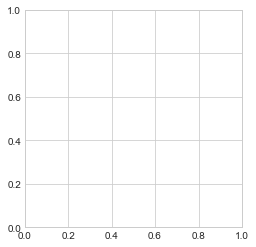

In [78]:
rotating_image_classification(x_train[0], model, None,digit_one.reshape(1,28,28),1)

In [ ]:
# SVM reliability diagram with calibration
def classification(y, prob, bins =10):
    from sklearn.datasets import make_classification
    from sklearn.svm import SVC
    from sklearn.calibration import CalibratedClassifierCV
    from sklearn.model_selection import train_test_split
    from sklearn.calibration import calibration_curve
    from matplotlib import pyplot
    linspace = np.linspace(0,1,num=bins)
    fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot perfectly calibrated
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot calibrated reliability
    pyplot.plot(mpv, fop, marker='.')
    pyplot.show()

import math
    
# SVM reliability diagram with calibration
def cumulativeClassification(y, prob, bins =10, thresholdType = ">="):
    from sklearn.datasets import make_classification
    from sklearn.svm import SVC
    from sklearn.calibration import CalibratedClassifierCV
    from sklearn.model_selection import train_test_split
    from sklearn.calibration import calibration_curve
    from matplotlib import pyplot
    print("max",max(prob))
    linspace = np.linspace(0,math.ceil(max(prob)),num=bins)
    # pyplot.hist(prob,bins=linspace,density=False)
    accuracy = []
    throughputs = []
    for point in linspace:
        true = 0
        false = 0   
        throughput = 0
        for i, p in enumerate(prob):
            
            if threshold == ">=":
                if p >= point:
                    throughput = throughput + 1
                    if y[i] ==True:
                        true = true +1
                    if y[i] ==False: 
                        false = false + 1
            else:
                if p <= point:
                    throughput = throughput + 1
                    if y[i] ==True:
                        true = true +1
                    if y[i] ==False: 
                        false = false + 1
        try:
            accuracy.append(true/(true+false))
            throughputs.append(throughput/len(prob))
            # print(point, throughput/len(prob))                
        except:
            accuracy.append(0)
            throughputs.append(0)
            pass
    # print(throughputs)
    pyplot.plot(linspace[:len(throughputs)], throughputs,label="Accepted (y) for threshold (x)")
    fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot calibrated reliability
    # pyplot.plot(mpv, fop, marker='.',label="calibration")
    # fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot perfectly calibrated
    # pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot calibrated reliability
    pyplot.plot(linspace[:len(accuracy)], accuracy, marker='.',color='blue',label="Accuracy")
    pyplot.legend(loc="upper right")
    pyplot.legend(bbox_to_anchor=(1.1, 1.05))
    pyplot.xlabel('Probability/Evidence')
    # pyplot.set_ylabel('Rating')
    pyplot.show()
    

In [6]:
def calcEntropy_Tensors2(y_hat):
    #entropy is the sum of y * log(y) for all possible labels.
    #doesn't deal with cases of log(0)
    val = y_hat * (tf.math.log(y_hat)/tf.math.log(tf.constant(2, dtype=y_hat.dtype)))
    # print(val)
    # print(tf.boolean_mask(val,tf.math.is_finite(val)))
    sumEntropies =  tf.reduce_sum(tf.boolean_mask(val,tf.math.is_finite(val)))
    
    return -sumEntropies



def getPredictions(model,dataset,stopping_point=None):
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
    print("outputs",num_outputs)
    #     train_ds, test_ds, validation_ds = (dataset)
    Results=[]
    Pred=[]
    Labels =[]
    Outputs = pd.DataFrame()
    pAcc=[]
    
    
    Evidence =[]
    
    Sum =[]
    Uncert=[]
    
    for i in range(num_outputs):
        Results.append([])
        Pred.append([])
        Labels.append([])
        Sum.append([])
        Uncert.append([])
        Evidence.append([])
    for i, (x,y) in enumerate(dataset):
        if stopping_point and i > stopping_point:
            break
        try:
            print("prediction: {} of {}".format(i,len(dataset)),end='\r')
        except:
            print("prediction: {}".format(i),end='\r')
            pass
        predictions = model.predict(x)
        print(predictions)
        for k, outputs in enumerate(predictions[0]):
            
            # print("output ", k, outputs)
            for j, prediction in enumerate(outputs):
                
                # print(prediction)
                # for pred
                Results[k].append(np.argmax(prediction))
                # Pred[k].append((np.amax(tf.nn.softplus(prediction))))
                # print(brevis.utils.calcEntropy_Tensors((prediction)).numpy())
                # Pred[k].append(calcEntropy_Tensors2((prediction)).numpy())
                # Pred[k].append((tf.reduce_mean(tf.nn.softplus(prediction)).numpy()))
                prediction_sum = tf.reduce_sum((prediction)+1).numpy()
                Pred[k].append((tf.nn.softplus(prediction).numpy())/prediction_sum)
                Evidence[k].append(tf.reduce_sum(tf.nn.softplus(prediction).numpy()/prediction_sum).numpy() + (10/prediction_sum))
                
                Sum[k].append(prediction_sum)
                Uncert[k].append(10/prediction_sum)
                
                # print((tf.nn.softplus(prediction).numpy()+1))
                Labels[k].append(np.argmax(y[j]))
    Outputs=[]
    for j in range(num_outputs):
#         "probs":Pred[j],
        df = pd.DataFrame({"x":Results[j],"y":Labels[j],'sum':Sum[j],'uncert':Uncert[j],"belief masses":Evidence[j]})
        conditions = [df['x'] == df['y'],df['x'] != df['y']]
        choices = [1, 0]
        #create new column in DataFrame that displays results of comparisons
        df['testy'] = np.select(conditions, choices, default=None)

        Outputs.append(df)
    return Outputs

In [7]:
pd.set_option('display.max_colwidth',1000)
#get thresholds from normal distribution data
outputs = getPredictions(model,test_ds,1)
for i, output in enumerate(outputs):
    print(model.outputs[i].name)
    display(output)

outputs 4
[[array([[3.62921651e-06, 4.69971837e-06, 3.84752724e-07, 9.73721325e-01,
        3.04072145e-08, 2.62163002e-02, 1.92937587e-05, 6.74700118e-07,
        3.24662069e-05, 1.20856203e-06],
       [1.23515093e-07, 1.26966988e-04, 2.48587907e-13, 1.09734227e-12,
        8.08256050e-14, 1.55590144e-14, 3.91848256e-13, 5.02587253e-15,
        9.99872088e-01, 8.73163970e-07],
       [5.56251360e-03, 9.10510402e-03, 4.21500346e-08, 1.05518382e-06,
        2.76089960e-08, 6.82292178e-09, 1.62984612e-08, 1.03268924e-07,
        9.60327327e-01, 2.50037666e-02],
       [9.77770030e-01, 2.74209306e-04, 1.95860257e-03, 2.33467974e-04,
        6.71130765e-05, 3.47954824e-06, 2.56528142e-06, 7.07906947e-05,
        1.93320066e-02, 2.87678151e-04],
       [2.02213837e-08, 1.26623149e-07, 2.58199783e-04, 1.02943850e-04,
        1.42620236e-01, 5.89851687e-08, 8.57018352e-01, 5.39069056e-09,
        5.96756777e-08, 3.08972794e-08],
       [3.26208904e-09, 1.20659438e-09, 9.12209543e-07, 1.02526

,x,y,sum,uncert,belief masses,testy
0,3,3,10.999999,0.909091,1.595061,1
1,8,8,11.000000,0.909091,1.595596,1
2,8,8,11.000000,0.909091,1.594788,1
3,0,0,11.000000,0.909091,1.595140,1
4,6,6,11.000000,0.909091,1.593013,1
...,...,...,...,...,...,...
59,3,6,11.000000,0.909091,1.591370,0
60,7,7,11.000000,0.909091,1.595598,1
61,5,3,11.000000,0.909091,1.595198,0
62,6,6,11.000000,0.909091,1.595597,1


branch_exit/Relu:0


,x,y,sum,uncert,belief masses,testy
0,3,3,10.508453,0.951615,1.638459,1
1,8,8,12.345901,0.809985,1.512702,1
2,0,8,10.000000,1.000000,1.693147,0
3,8,0,10.746116,0.930569,1.616636,0
4,0,6,10.000000,1.000000,1.693147,0
...,...,...,...,...,...,...
59,0,6,10.000000,1.000000,1.693147,0
60,0,7,10.000000,1.000000,1.693147,0
61,0,3,10.000000,1.000000,1.693147,0
62,0,6,10.000000,1.000000,1.693147,0


branch_exit_1/Relu:0


,x,y,sum,uncert,belief masses,testy
0,8,3,10.338741,0.967236,1.655435,0
1,8,8,13.472121,0.742274,1.465324,1
2,8,8,11.218682,0.891370,1.579151,1
3,8,0,13.299291,0.751920,1.471797,0
4,4,6,14.898956,0.671188,1.384836,0
...,...,...,...,...,...,...
59,0,6,10.000000,1.000000,1.693147,0
60,0,7,10.000000,1.000000,1.693147,0
61,0,3,10.000000,1.000000,1.693147,0
62,0,6,10.000000,1.000000,1.693147,0


branch_exit_2/Relu:0


,x,y,sum,uncert,belief masses,testy
0,3,3,16.614458,0.601885,1.347057,1
1,8,8,18.709570,0.534486,1.333438,1
2,8,8,14.079574,0.710249,1.417262,1
3,8,0,10.540575,0.948715,1.635380,0
4,6,6,13.912794,0.718763,1.449810,1
...,...,...,...,...,...,...
59,3,6,11.309479,0.884214,1.572733,0
60,7,7,18.067980,0.553465,1.345287,1
61,5,3,14.128904,0.707769,1.430559,0
62,6,6,15.916586,0.628275,1.392108,1


threshold -0.14620175913808742
max -0.05015232958933112


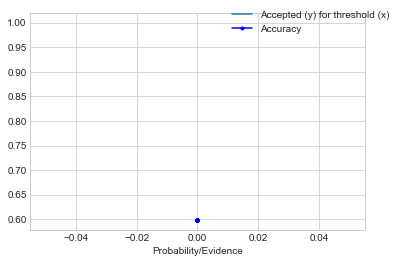

-----------------
rollover enabled, 3296 predictions provided
threshold -0.1714602659758459
max -0.08013616888071527


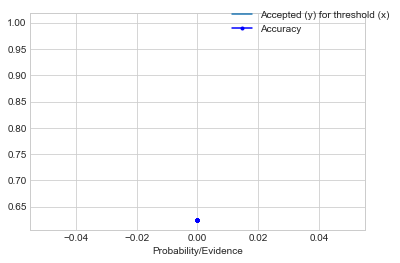

-----------------
rollover enabled, 1063 predictions provided
threshold -0.10319103352156156
max -0.06385196819093235


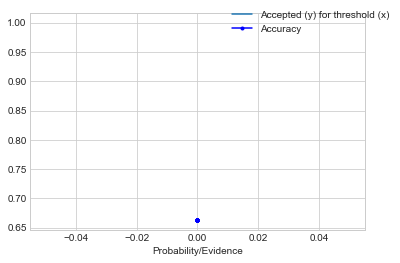

-----------------
rollover enabled, 477 predictions provided
threshold 0
max 0.9090909879069752


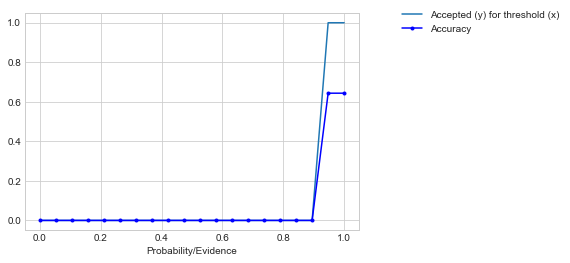

-----------------
thresholds [-0.14620175913808742, -0.1714602659758459, -0.10319103352156156, 0]
input_predictions [9984, 3296, 1063, 477]
Accepted_list [6688, 2233, 586, 477]
Acceptance_correct [4344, 1487, 412, 307]
overall Accuracy 0.6560496794871795
branch_cost [116660589760, 65694243692, 63414140602, 67663218447]
base cost:  313432192501  total cost: 1125185198592
cost difference:  0.27856053642832596


In [47]:
rollOver_indices = pd.Index([])
_predictions = outputs.copy()
    # print(_branch_predictions)
_predictions.append(_predictions.pop(0))
Accepted_df = pd.DataFrame()

Accepted_list =[]
Acceptance_correct =[]
Input_predictions =[]
Branch_cost =[17443270,29419724,108215257,141851611] #flat exit costs
# Branch_cost =[482376,1517643,80095445,114361924,112698838] #Conv2d exit costs

Base_cost = 112698838
Branch_flops = []
Thresholds=[]

Results=[]
for i, output in enumerate(_predictions):    
    if len(rollOver_indices)>0:
        print("rollover enabled, {} predictions provided".format(len(rollOver_indices)))
        output = output.iloc[rollOver_indices]
    # print(output['probs'])
    # print(output)
    from matplotlib import pyplot
    # hist = output.hist(bins=10)
    # print(model.output[i].name)
    try: 
        mean = output.loc[(output['testy'] == False)].groupby("testy")["uncert"].mean().iloc[0]
        std = output.loc[(output['testy'] == False)].groupby("testy")["uncert"].std().iloc[0]
        threshold = mean
    except:
        print("no false values found, threshold set to 0")
        threshold = 0
        pass
    # threshold = 0.05
    if i == len(_predictions)-1:
        threshold = 0
    print("threshold", threshold)
    Thresholds.append(threshold)
    Accepted = output.loc[(output["uncert"] >= threshold)]
    # print("Accuracy", len(Accepted), Accepted.groupby("testy").count())
    Rejected = output.loc[(output["uncert"] < threshold)]
    rollOver_indices = Rejected.index
    # Accepted_df = pd.concat([Accepted_df, Accepted])
    Results.append(Accepted)
    Accepted_list.append(len(Accepted))
    Acceptance_correct.append(len(Accepted.loc[(Accepted['testy'] == True)]))
    Input_predictions.append(len(output))
    Branch_flops.append(len(Accepted)* Branch_cost[i]) 
    
    cumulativeClassification(output['testy'].tolist(),output['uncert'].tolist(),20,thresholdType="<=")
    print("-----------------")
_Results = pd.concat(Results)
# print(_Results)
# print(_Results.groupby("testy").count())
print("thresholds", Thresholds)
print("input_predictions",Input_predictions)
print("Accepted_list",Accepted_list)
print("Acceptance_correct",Acceptance_correct)
print("overall Accuracy", sum(Acceptance_correct)/sum(Accepted_list))
print("branch_cost", Branch_flops)
print("base cost: ",sum(Branch_flops)," total cost:", sum(Accepted_list)*Base_cost)
print("cost difference: ",sum(Branch_flops)/(sum(Accepted_list)*Base_cost))


In [11]:
test_set = brevis.dataset.prepare.test_set(tf.keras.datasets.cifar100.load_data(label_mode="fine"),32,(227,227),include_targets=False,num_outputs = 100)

targetsis : False


In [12]:
noisy_test_set = tf.data.Dataset.sample_from_datasets([test_ds,test_set],weights=[.5,.5])
noisy_test_set

<_DirectedInterleaveDataset element_spec=(TensorSpec(shape=(32, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, None), dtype=tf.float32, name=None))>

In [15]:
outputs = getPredictions(model,test_set,50)
for i, output in enumerate(outputs):
    print(model.outputs[i].name)
    display(output)

outputs 4
dense_2/Softmax:0 312


,x,y,probs,testy
0,2,49,7.551337,0
1,4,33,7.546795,0
2,4,72,7.486523,0
3,9,51,7.498840,0
4,8,71,7.550732,0
...,...,...,...,...
1627,1,41,7.474925,0
1628,7,16,7.548650,0
1629,4,40,7.541000,0
1630,3,54,7.543172,0


branch_exit/BiasAdd:0


,x,y,probs,testy
0,2,49,0.096640,0
1,4,33,0.133135,0
2,4,72,0.010023,0
3,1,51,0.044992,0
4,0,71,0.037252,0
...,...,...,...,...
1627,9,41,0.000735,0
1628,5,16,0.049560,0
1629,2,40,0.470591,0
1630,9,54,0.024822,0


branch_exit_1/BiasAdd:0


,x,y,probs,testy
0,0,49,0.185794,0
1,4,33,0.033725,0
2,4,72,0.295466,0
3,9,51,0.209619,0
4,8,71,0.064629,0
...,...,...,...,...
1627,2,41,0.013954,0
1628,7,16,0.115923,0
1629,5,40,0.392026,0
1630,0,54,0.006129,0


branch_exit_2/BiasAdd:0


,x,y,probs,testy
0,2,49,1.133475,0
1,4,33,0.452156,0
2,2,72,0.005557,0
3,3,51,0.000726,0
4,8,71,0.120162,0
...,...,...,...,...
1627,1,41,0.000139,0
1628,7,16,0.001010,0
1629,4,40,0.181385,0
1630,3,54,0.107175,0


In [16]:
for predictions in outputs: 
    outliers = predictions.loc[(predictions['y'] > 9)]
    print(outliers)
    print(len(outliers)/len(predictions))

      x   y     probs testy
0     2  49  7.551337     0
1     4  33  7.546795     0
2     4  72  7.486523     0
3     9  51  7.498840     0
4     8  71  7.550732     0
...  ..  ..       ...   ...
1627  1  41  7.474925     0
1628  7  16  7.548650     0
1629  4  40  7.541000     0
1630  3  54  7.543172     0
1631  9  70  7.551531     0

[1459 rows x 4 columns]
0.8939950980392157
      x   y     probs testy
0     2  49  0.096640     0
1     4  33  0.133135     0
2     4  72  0.010023     0
3     1  51  0.044992     0
4     0  71  0.037252     0
...  ..  ..       ...   ...
1627  9  41  0.000735     0
1628  5  16  0.049560     0
1629  2  40  0.470591     0
1630  9  54  0.024822     0
1631  2  70  0.012795     0

[1459 rows x 4 columns]
0.8939950980392157
      x   y     probs testy
0     0  49  0.185794     0
1     4  33  0.033725     0
2     4  72  0.295466     0
3     9  51  0.209619     0
4     8  71  0.064629     0
...  ..  ..       ...   ...
1627  2  41  0.013954     0
1628  7  16  0.1

threshold 0.05643888
      x   y     probs testy
2     4  72  0.010023     0
3     1  51  0.044992     0
4     0  71  0.037252     0
5     2  92  0.014611     0
7     6  14  0.001453     0
...  ..  ..       ...   ...
1626  5  64  0.015553     0
1627  9  41  0.000735     0
1628  5  16  0.049560     0
1630  9  54  0.024822     0
1631  2  70  0.012795     0

[1003 rows x 4 columns]
accepted outliers 0.6874571624400274
max 1.5261718034744263


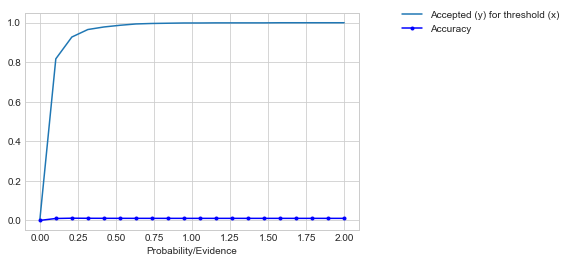

-----------------
rollover enabled, 512 predictions provided
threshold 0.098358706
      x   y     probs testy
1     4  33  0.033725     0
6     4  15  0.032279     0
15    4  43  0.075044     0
17    5  97  0.066603     0
24    5  21  0.017949     0
...  ..  ..       ...   ...
1592  5  61  0.007048     0
1600  0  60  0.036431     0
1603  7  27  0.041016     0
1618  3  67  0.036607     0
1625  3  61  0.058500     0

[263 rows x 4 columns]
accepted outliers 0.5767543859649122
max 1.8394677639007568


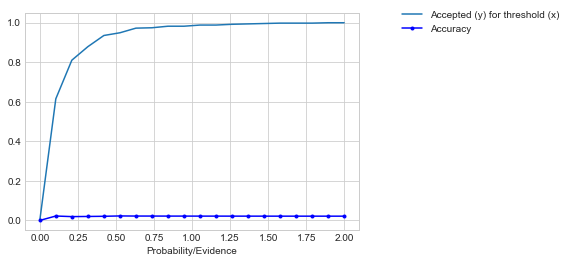

-----------------
rollover enabled, 214 predictions provided
threshold 0.19275412
      x   y     probs testy
10    2  71  0.000849     0
13    0  69  0.006570     0
37    2  11  0.037204     0
56    8  71  0.174741     0
72    3  67  0.009698     0
...  ..  ..       ...   ...
1587  6  84  0.042657     0
1606  9  23  0.027153     0
1608  3  47  0.002372     0
1623  2  79  0.089529     0
1629  4  40  0.181385     0

[144 rows x 4 columns]
accepted outliers 0.7461139896373057
max 6.649153232574463


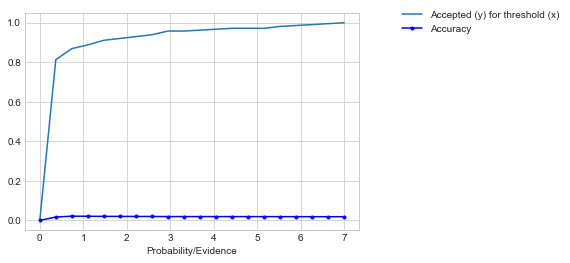

-----------------
rollover enabled, 53 predictions provided
threshold 7.551586151123047
      x   y     probs testy
0     2  49  7.551337     0
65    5  35  7.551216     0
80    8  71  7.551586     0
187   2  95  7.551582     0
193   9  13  7.551586     0
253   7  68  7.551057     0
254   2  50  7.551585     0
284   0  30  7.551571     0
318   5  10  7.551535     0
356   6  96  7.551574     0
363   3  94  7.551570     0
374   9  87  7.551575     0
453   6  18  7.540780     0
566   3  28  7.508910     0
605   3  84  7.550809     0
610   5  98  7.551113     0
736   8  95  7.551586     0
805   6  78  7.551586     0
837   8  71  7.551538     0
846   5  32  7.542802     0
848   3  53  7.549619     0
870   2  22  7.551585     0
875   6  14  7.551585     0
885   6  26  7.551586     0
908   0  69  7.539238     0
1003  5  40  7.551586     0
1007  6  85  7.551230     0
1116  8  25  7.542521     0
1156  2  93  7.543054     0
1196  6  51  7.551586     0
1228  3  36  7.549281     0
1327  1  58  7.5

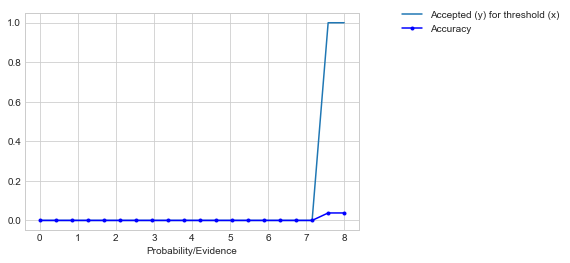

-----------------
thresholds [0.05643888, 0.098358706, 0.19275412, 0, 0.05643888, 0.098358706, 0.19275412, 7.551586627960205, 0.05643888, 0.098358706, 0.19275412, 7.551586151123047]
input_predictions [1632, 512, 214, 53]
Accepted_list [1120, 298, 161, 53]
Acceptance_correct [11, 6, 2, 2]
overall Accuracy 0.012867647058823529
branch_cost [19536462400, 8767077752, 17422656377, 7518135383]
base cost:  53244331912  total cost: 183924503616
cost difference:  0.289490148757798


In [17]:
rollOver_indices = pd.Index([])
_predictions = outputs.copy()
    # print(_branch_predictions)
_predictions.append(_predictions.pop(0))
Accepted_df = pd.DataFrame()

Accepted_list =[]
Acceptance_correct =[]
Input_predictions =[]
Branch_cost =[17443270,29419724,108215257,141851611] #flat exit costs
# Branch_cost =[482376,1517643,80095445,114361924,112698838] #Conv2d exit costs

Base_cost = 112698838
Branch_flops = []
# Thresholds=[]

Results=[]
for i, output in enumerate(_predictions):    
    if len(rollOver_indices)>0:
        print("rollover enabled, {} predictions provided".format(len(rollOver_indices)))
        output = output.iloc[rollOver_indices]
    # print(output['probs'])
    # print(output)
    from matplotlib import pyplot
    # hist = output.hist(bins=10)
    # print(model.output[i].name)
    mean = output.loc[(output['testy'] == False)].groupby("testy")["probs"].mean().iloc[0]
    std = output.loc[(output['testy'] == False)].groupby("testy")["probs"].std().iloc[0]
    # threshold = mean
    threshold = Thresholds[i]
    # threshold = 0.05
    if i == len(_predictions)-1:
        threshold = max(output['probs'])
    print("threshold", threshold)
    Thresholds.append(threshold)
    Accepted = output.loc[(output["probs"] <= threshold)]
    Accepted_outliers = Accepted.loc[(Accepted['y']>9)]
    # print("Accuracy", len(Accepted), Accepted.groupby("testy").count())
    Rejected = output.loc[(output["probs"] > threshold)]
    Rejected_outliers = Rejected.loc[(Rejected['y']>9)]
    rollOver_indices = Rejected.index
    # Accepted_df = pd.concat([Accepted_df, Accepted])
    Results.append(Accepted)
    print(Accepted_outliers)
    print("accepted outliers",len(Accepted_outliers)/(len(Accepted_outliers)+len(Rejected_outliers)))
    Accepted_list.append(len(Accepted))
    Acceptance_correct.append(len(Accepted.loc[(Accepted['testy'] == True)]))
    Input_predictions.append(len(output))
    Branch_flops.append(len(Accepted)* Branch_cost[i]) 
    
    cumulativeClassification(output['testy'].tolist(),output['probs'].tolist(),20,thresholdType="<=")
    print("-----------------")
_Results = pd.concat(Results)
# print(_Results)
# print(_Results.groupby("testy").count())
print("thresholds", Thresholds)
print("input_predictions",Input_predictions)
print("Accepted_list",Accepted_list)
print("Acceptance_correct",Acceptance_correct)
print("overall Accuracy", sum(Acceptance_correct)/sum(Accepted_list))
print("branch_cost", Branch_flops)
print("base cost: ",sum(Branch_flops)," total cost:", sum(Accepted_list)*Base_cost)
print("cost difference: ",sum(Branch_flops)/(sum(Accepted_list)*Base_cost))


In [ ]:
1015303831542
120020480229  